<CENTER>
    <a href="http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html" class="icons"><img src="./images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

# A more difficult notebook in python

# Z decays: finding the Z boson mass!

## The following analysis is searching for events where one or two [Z bosons](https://en.wikipedia.org/wiki/W_and_Z_bosons) decay to two ((or four!) leptons (electrons or muons) of same flavour and opposite charge.

Lepton flavour means whether it is an electron or a muon.

We know the Z boson has charge zero, so to conserve charge, the two leptons must have opposite charges.

So, this can happen in two ways. First, though, we need to think about how we talk about decaysd in particle physcis.

## Feynman diagrams and Lorentz vectors

We show decays with a [Feynman diagram](https://en.wikipedia.org/wiki/Feynman_diagram)), which for our purposes we can think of a diagram of the interaction itself (this is not strictly true, but for our purposes will suffice), where time goes from left to right.

Each particle is a single line, and you can think of the vertical axis as space, so here we have an electron $e^-$ and its antiparticle, a positron, $e^+$, moving towards each other in space, annihilating each other, producing a photon ($\gamma$) and then that $\gamma$ decaying to two muons.

<CENTER><img src="./images/electronpositronannihilation.png" style="width:50%"></CENTER>


You may have noticed that the arrow for the positron is the wrong way round for the process which I have just described. By convention, the arrow for an antiparticle is reversed. (If you really want to know, it's because an antiparticle can be thought of as a particle moving backwards in time. If you have time, ask someone to explain this to you).

Now, we say that energy and momentum must be conserved at each vertex in the Feynman diagram. $\vec{p}^\mathrm{tot}_\mathrm{before} = \vec{p}^\mathrm{tot}_\mathrm{after}$, and $E^\mathrm{tot}_\mathrm{before} =E^\mathrm{tot}_\mathrm{after}$.

A concise way of writing that is with a **Lorentz vector**, or 4-vector, which neatly packages together energy and momentum. $P^\mu = (E/c, \vec{p}) = (E/c, p_x, p_y, p_z)$. 

_Why do you think the energy is divided by $c$? Consider a normal 3-vector like position. What are the units of each of its components?_

The $\mu$ is just an arbitrary index, so $P^0 = E/c$, $P^1 = p_1 = p_x$, etc., but we write it there to make it clear that this is no ordinary spatial vector that we're dealing with.

However, we can add and subtract these four-vectors like usual: $P^\nu_{e^+} + P^\nu_{e^-} = (E_{e^+} + E_{e^-}, \vec{p}_{e^+} + \vec{p}_{e^-}) = P^\nu_\mathrm{tot}$

Since all of its components must be conserved, $P^\mu_\mathrm{before} = P^\mu_\mathrm{after}$ at every vertex.

For the electron-positron annihilation above, therefore, we have:

$P^\nu_{e^+} + P^\nu_{e^-} = (E_{e^+} + E_{e^-}, \vec{p}_{e^+} + \vec{p}_{e^-}) = P^\nu_\gamma =  P^\nu_{\mu^+} +  P^\nu_{\mu^-}$

More interestingly, if you remember the most famous equation in Physics, $E=mc^2$. That's only true if an object is stationary. If it's not, you have $E^2 = m^2 c^4 + p^2 c^2$. The $m$ in this is called its invariant mass.

Clearly, you can quite easily construct $m$ from the components of the 4-vector. $m = \frac{1}{c^2}\sqrt{E^2 - p^2 c^2}$


###  Units

One last thing - we can just pick a system of units in which $c = 1$. We basically do this by redefining what our SI units are. Imagine that we measured distances in pirate-wizards, which we define to be equal to $299 792 458$ metres. Let's keep measuring times in seconds, though. You, then are about $6\times 10^{-9}$ pirate-wizards tall.

You may have noticed the specific value I picked for a pirate-wizard.

`What does that mean the speed of light is, measured in our new unit system?`

Correct! It's exactly $1$ pirate-wizard per second!

Let's then define the unit of energy as 1 GeV - one gigaelectronvolt.

What does that make our unit of mass? Now, we know that the units still have to match up dimensionally, and we know that $1 kg = 1 Joule /c^2$, so let's measure mass in $eV /c^2$. Similarly, let's measure momentum in $eV/c$.

So, if we measure a particle A to have a mass of $3 GeV/c^2$, an energy of $5 GeV/c^2$, and a momentum of $4 GeV/c$.

The advantage of setting $c=1$ is that we can throw out all of those extra $c$s. That means we can measure everything in units  of $GeV$! So, our particle A just has $m=3$, $E=5$, and $p=4$.

Sure, you can't do dimensional analysis any more, but it makes a lot of things easier - trust me. For one thing, our mass equation pops out pretty simply: $m = \sqrt{E^2 - p^2}$. 

Check if particle A satisfies this!
 
## How to use TLorentzVectors in python
 

Since we're using code, we're going to have a pretty simple function that takes our Lorentz Vector and spits out the rest mass of that Lorentz vector.

Thankfully, the dirty work has been done for you already. If you have a TLorentzVector variable called `particle1`, and you want its invariant mass, just do this:

`particle1.M()`

First of all - like we did it in the first notebook - ROOT is imported to read the files in the _.root_ data format, and to give us the relevant libraries.

In [1]:
from numpy import pi
import ROOT

Welcome to JupyROOT 6.20/00


Now, let's declare two TLorentzVectors. We do this by declaring two variables, and then saying that each one is a `TLorentzVector` from the library `ROOT`.

In [2]:
particle1  = ROOT.TLorentzVector()
particle2 = ROOT.TLorentzVector()

Of course, they're just empty vectors at the moment. Let's set them with values. Notice the way this is written, with the E coming last.

_Try editing the code to print the energy $E$._

In [3]:
particle1.SetPxPyPzE(0, 0, 0, 1)
print(particle1.Px())
print(particle1.Py())
print(particle1.Pz())
print(particle1.P())
####
particle1_energy = #FIX ME!
print("The energy is ", particle1_energy, "MeV") 
particle1_mass = #FIX ME!
print("The energy is ", particle1_mass, "MeV/c^2") 

SyntaxError: invalid syntax (<ipython-input-3-1841c14707bb>, line 7)

Now, the detector gives us momentum in an odd way: by measuring the amount of momentum perpendicular to the direction of the beam, the rapidity, and in which direction of perpendicular to the beam it was emitted in (in radians, of course).

<CENTER><img src="./images/eta_def.jpg" style="width:40%"><img src="./images/z-axis_medium.jpg" style="width:40%"><img src="./images/pt_def.jpg" style="width:40%"></CENTER>

^(Source: https://www-cdf.fnal.gov/physics/new/qcd/ue_escan/etaphi.html)

Does this uniquely determine momentum?

So, we can also define the components of $P^\mu = (E, \v{p}) like this:

In [ ]:
particle2.SetPtEtaPhiE(1, 1, pi/2, 5)
particle2.M()

Finally, all you need to know is that you can add four-vectors in Python just like in maths: $P^\mu_1 + P^\mu_2 = P^\mu_3$ means that in python, we can define particle3 with just one line: `particle 3 = particle1 + particle2` 

## Decays

Back to the decays.

We want to find $Z^0$ bosons, but they don't live long enough to actually find with the detector itself. Instead, we have to reconstruct them from their decay products.

We don't particularly mind where the $Z^0$s themselves come from. All you need to know here is that each time the LHC smashes two protons together, they produce lots and lots of particles, some of which are $Z^0$s.


From theory, we know that there are two main decay routes. The first is to two leptons, and the second is to four leptons.


### To two leptons

The first option is that a random Z that emerges from the collision aftermath in the LHC (we don't care how) can decay directly to two leptons. The decay happens at the vertex below, marked by a dot.

<CENTER><img src="./images/Z_ElectronPositron.png" style="width:30%"></CENTER>

Using what you know above, write down the equation of conservation of the energy-momentum four-vector.

The ATLAS detector can measure the momentum and energy of leptons coming out of decays, and you can access that information quite simply. It also measures the charge and flavour of each lepton (whether its a muon/antimuon, or electron/antielectron).

We mentioned earlier that each smash makes lots of particles. That's true - in fact, it makes so many that we can't actually store all the records of what happened, even on some of the biggest data storage facilities in the world. 

Instead, we use what is called a trigger. For us, the trigger here was the detector seeing **exactly one high energy leptons** and **one jet with large** (don't worry about what that is for now), so all of our data will contain at least those two things, as well as a bunch of other particles.


Next we have to open the data that we want to analyze. As described earlier, the data is stored in a `*.root` file.

In [ ]:
## CHOOSE here which sample to use!!

## 2lep
#f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root") ## 13 TeV sample
f = ROOT.TFile.Open("~/mc_361106.Zee.1largeRjet1lep.root")

## 4lep
#f = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/4lep/MC/mc_363490.llll.4lep.root") ## 4 lepton 13 TeV sample

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _c_. The two following arguments define the width and the height of the canvas.

In [ ]:
canvas = ROOT.TCanvas("Canvas","c",800,600)

The next step is to, like before, define a tree named `t` to get the data out of the `.root` file.

In [ ]:
tree = f.Get("mini")
tree.GetEntries()

Now we define a histogram that will later be placed on this canvas. Its name is `variable` the header of the histogram is `Mass of the Z boson`, the x axis is named `mass [GeV]` and the y axis is named `events`. The three following arguments indicate that this histogram contains 30 bins which fill the gap from 40 to 140.

In [ ]:
hist = ROOT.TH1F("variable","Mass of the Z boson; mass [GeV]; events", 30, 40, 140)

Time to fill our above defined histogram. To do that, we need to reconstruct our $Z^0$ boson Lorentz vector, and then we need to call `.M()` on it to find its mass!

How do we reconstruct the Lorentz vector? Well, we need to find two leptons of opposite charge and the same flavour, build their `TLorentzVector`s, and add them together.

The process of narrowing down the number of candidates by imposing a condition is called making a **cut**!

## Cuts

Why do we make cuts? Remember that there are lots of other particles flying around, and sometimes you'll just have two electrons of the same charge and same flavour, that have nothing to do with each other, that we measure. Obviously, they won't reconstruct to a $Z^0$ boson.Therefore, we need to make cuts based on that.

You may have spotted an issue here - what if we have two random unassociated electrons of the same flavour and opposite charge? We can't eliminate those.

One thing you might want to take note of is that the detector gives us energies and momenta in units of $MeV$! This meansthat when building our LorentzVectors, we have to divide by a thousand, so that our LorentzVector has an overall unit of $GeV$.

### Make sure you read through the code - particularly the comments! You'll be doing this yourself shortly.

In [ ]:
# Declare the two TLorentzVectors

leadLepton  = ROOT.TLorentzVector()
trailLepton = ROOT.TLorentzVector()

# Now, iterate through each event in the tree!
for event in tree:
    # Cut #1: At least 2 leptons in the event. lep_n  is the number of them.
    if tree.lep_n >= 2:
        
        # Cut #2: Leptons with opposite charge.
        #We have a list of charges, each corresponding to a lepton: lep_charges.
        #Clearly, we can't let these be equal
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons).
            # lep_type gives back a number, which is a code for what kind of lepton it is.
            if ( tree.lep_type[0] == tree.lep_type[1]):
                
                # By now we should only have paricles that look right left.
                
                # Let's set the components of a TLorentzVector for each lepton. Notice that the energy and momenta are given in MeV!
                
                leadLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)
                
                # Now, reconstruct the Z0 boson Lorentz vector! 
                Z0_boson = leadLepton + trailLepton
                
                # And chuck this particular value into the histogram.
                hist.Fill(Z0_boson.M())

After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies.

In [ ]:
hist.Draw()
hist.SetFillColor(3)


In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic:

In [ ]:
%jsroot off

In [ ]:
canvas.Draw()

**Done**

Well done!

If everything went well, you have just reconstructed the $Z^0$ boson!

*Interpret this graph - what is the mass of this boson?*

### To four leptons

Now it is your turn. **This one will be much harder**, and will test your logic and coding skills.

We have at theory that a more complicated interaction occurs between a quark, $q$, and an antiquark, $\bar{q}$. We think that they come towards each other, quickly exchange a particle (the vertical line below). When this happens, the quark and antiquarks turns into a $Z^0$, which then decay themselves.

<CENTER><img src="https://inspirehep.net/record/1229037/files/fig01a.png" style="width:30%"></CENTER>

Does this happen in reality? Let's find out, using the data from above.

To find out, we are going to apply cuts, and then see if the plots that we get out still make sense.

*We can't reconstruct the 4-momenta of the quarks, or the exchanged particle - why?*

Instead, we are going to work out the masses of both $Z^0$s in the situation.

This one will be a lot harder, as its much less clean.

Tips:

* You will need to add some cuts.
* What will these cuts be?
* There may be some combinatoric issues.
* What do you have to have?

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas_Zl4


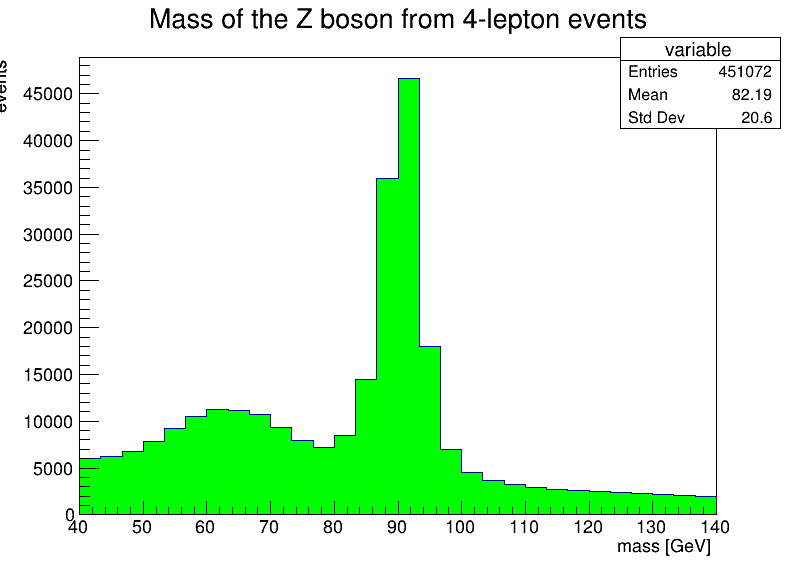

In [8]:
# Declare four TLorentzVectors
f_4l = ROOT.TFile.Open("~/mc_363490.llll.4lep.root") ## 4 lepton 13 TeV sample
tree = f_4l.Get("mini")
tree.GetEntries()

firstLepton  = ROOT.TLorentzVector()
secondLepton = ROOT.TLorentzVector()
thirdLepton = ROOT.TLorentzVector()
fourthLepton = ROOT.TLorentzVector()

canvas_Zl4 = ROOT.TCanvas("Canvas_Zl4","c",800,600)
hist_Zl4 = ROOT.TH1F("variable","Mass of the Z boson from 4-lepton events; mass [GeV]; events", 30, 40, 140)

# Now, iterate through each event in the tree!
for event in tree:
    # Cut #1: At least 2 leptons in the event. lep_n  is the number of them.
    if tree.lep_n >= 4:
        
        # Cut #2: Leptons with opposite charge.
        #We have a list of charges, each corresponding to a lepton: lep_charges.
        #Clearly, we can't let these be equal
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons).
            # lep_type gives back a number, which is a code for what kind of lepton it is.
            if ( tree.lep_type[0] == tree.lep_type[1]):

                # Cut #2: Leptons with opposite charge.
                #We have a list of charges, each corresponding to a lepton: lep_charges.
                #Clearly, we can't let these be equal
                if (tree.lep_charge[2] != tree.lep_charge[3]):

                    # Cut #3: Leptons of the same family (2 electrons or 2 muons).
                    # lep_type gives back a number, which is a code for what kind of lepton it is.
                    if ( tree.lep_type[2] == tree.lep_type[3]):
                        # By now we should only have paricles that look right left.

                        # Let's set the components of a TLorentzVector for each lepton. Notice that the energy and momenta are given in MeV!

                        firstLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                        secondLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)

                        thirdLepton.SetPtEtaPhiE(tree.lep_pt[2]/1000., tree.lep_eta[2], tree.lep_phi[2], tree.lep_E[2]/1000.)
                        fourthLepton.SetPtEtaPhiE(tree.lep_pt[3]/1000., tree.lep_eta[3], tree.lep_phi[3], tree.lep_E[3]/1000.)
                        
                        # Now, reconstruct the Z0 boson Lorentz vector! 
                        Z0_boson1 = firstLepton + secondLepton
                        Z0_boson2 = thirdLepton + fourthLepton

                        # And chuck this particular value into the histogram.
                        hist_Zl4.Fill(Z0_boson1.M())
                        hist_Zl4.Fill(Z0_boson2.M())
                        
hist_Zl4.Draw()
hist_Zl4.SetFillColor(3)

canvas_Zl4.Draw()

Why is this a really bad way to do it?

What is combinatoric background?